In [1]:
# Import Necessary Libraries
import xarray as xr
import numpy as np
import tensorflow as tf

# Import Model module
from sys import path
path.append('../mloceanbl/')
import data
import models

In [2]:
# Import data class (Need to have data files ready)
lat_bounds = np.array([-10, 10])
# lat_bounds = np.array([-45, -35])
lon_bounds = np.array([-150, -120])
# lon_bounds = np.array([60, 120])
dataset = data.dataset(lat_bounds, lon_bounds)

<xarray.Dataset>
Dimensions:              (lat: 230, lon: 720, testing_index: 25, time: 200, training_index: 150, validation_index: 25)
Coordinates:
  * time                 (time) datetime64[ns] 2011-08-26T12:00:00 ... 2015-06-19T12:00:00
  * lat                  (lat) float32 -54.75 -54.25 -53.75 ... 59.25 59.75
  * lon                  (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
  * training_index       (training_index) int64 1 2 3 4 5 ... 196 197 198 199
  * testing_index        (testing_index) int64 13 18 27 30 ... 158 173 181 182
  * validation_index     (validation_index) int64 0 8 9 15 ... 157 164 183 195
Data variables:
    salinity             (time, lat, lon) float32 ...
    salinity_anomaly     (time, lat, lon) float32 ...
    temperature          (time, lat, lon) float32 ...
    temperature_anomaly  (time, lat, lon) float32 ...
    height               (time, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:          (index: 448090)
Coordinates:
  * index     

In [3]:
# Create model class from available models:
# Linear model: LINEAR
# Feedforward Neural Network: ANN
# Variational ANN: VANN
# ANN with Dropout: DROPOUT
# Variational AutoEncoder: VAE

m = models.MLD_ML(dataset, 'ANN')


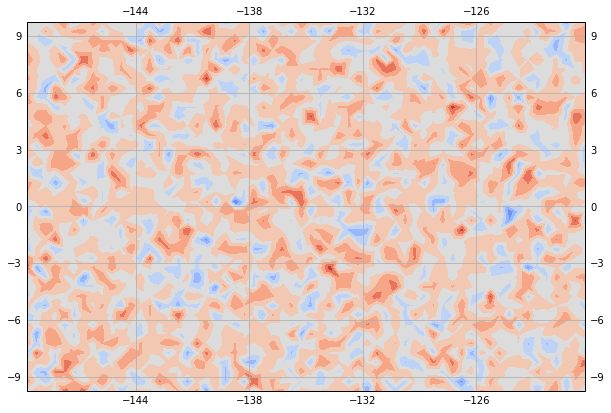

In [4]:
# Evaluate model on week 10
mld_estimate = m.evaluate(10)

# Graph estimate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.tricontourf(m.X_l[:,0], m.X_l[:,1], mld_estimate, cmap='coolwarm', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

In [ ]:
# Train model
losses = m.train(num_epochs = 200,
            print_epoch = 1, 
            lr = 2e-4,
            num_early_stopping = 10, 
            num_restarts = 3, 
            mini_batch_size = 25)

Instructions for updating:
Use tf.identity instead.
Reject!
Reject!


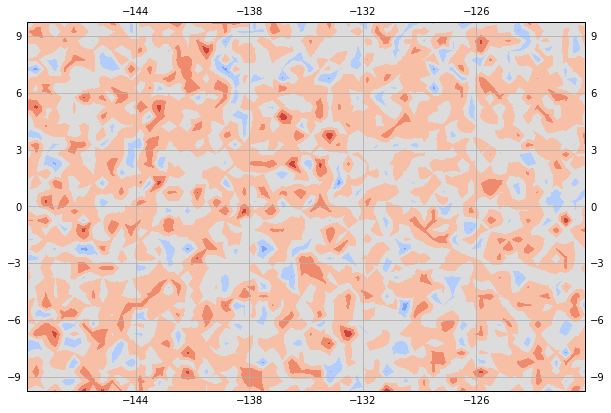

In [6]:
# Evaluate model on week 10
mld_estimate = m.evaluate(10)

# Graph estimate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.tricontourf(m.X_l[:,0], m.X_l[:,1], mld_estimate, cmap='coolwarm', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)